VERSION TRES BROUILLON! (concept + definitions rng, seed, periode, correlation, Monte Carlo etc à ajouter)

Créer un générateur de nombres aléatoires de type générateur congruentiel linéaire (LC-RNG).
Les nombres générés formeront une suite où chaque terme n+1 dépend du terme précédent n, selon la formule: x[n+1] = (k * x[n] + l) mod m

On se propose d'étudier quatre combinaisons de paramétres k,l,m pour lesquelles nous allons calculer la période et tracer la correlation x[n+1]=f(x[n]):

1) k=899, l=0, m=32768

 2) k=899, l=0, m=32771

3) k=895, l=0, m=32768

4) k=16807, l=0, m=6075

La valeur initiale de la séquance générée sera =12. 

In [2]:
from pylab import*

def lcrng(x0,k,l,m):
    return (k*x0+l)%m

N_corr=33000
x0_0=12
p1=[]
p1_1=[]

# k=899 l=0 m=32768

for j in range(0,3000):
    x0=x0_0
    for i in range(0,3000):
        x=lcrng(x0,899,0,32768)
       # print(x)
        if i<=N_corr:
            p1.append(x)
            p1_1.append(p1[i-1])
        x0=x
        if x==x0_0:
            print("Repetition found!", x, " = ", x0_0)
            print("The indices are ", j, "and", i)
            print("The period is ", (i)+(j+1))
            break
    if x==x0_0:
        break
    else:
        x0_0=lcrng(x0_0,899,0,32768)

Repetition found! 12  =  12
The indices are  0 and 2047
The period is  2048


In [3]:
x0_0=12
p2=[]
p2_1=[]
# k=899 l=0 m=32771

for j in range(0,33000):
    x0=x0_0
    for i in range(0,33000):
        x=lcrng(x0,899,0,32771)
       # print(x)
        if i<=N_corr:
            p2.append(x)
            p2_1.append(p2[i-1])
        x0=x
        if x==x0_0:
            print("Repetition found!", x, " = ", x0_0)
            print("The indices are ", j, "and", i)
            print("The period is ", (i)+(j+1))
            break
    if x==x0_0:
        break
    else:
        x0_0=lcrng(x0_0,899,0,32771)

Repetition found! 12  =  12
The indices are  0 and 32769
The period is  32770


In [4]:
x0_0=12
p3=[]
p3_1=[]

# k=895 l=0 m=32768

for j in range(0,100):
    x0=x0_0
    for i in range(0,100):
        x=lcrng(x0,895,0,32768)
        #print(x)
        if i<=N_corr:
            p3.append(x)
            p3_1.append(p3[i-1])
        x0=x
        if x==x0_0:
            print("Repetition found!", x, " = ", x0_0)
            print("The indices are ", j, "and", i)
            print("The period is ", (i)+(j+1))
            break
    if x==x0_0:
        break
    else:
        x0_0=lcrng(x0_0,895,0,32768)


Repetition found! 12  =  12
The indices are  0 and 63
The period is  64


In [5]:
x0_0=12
p4=[]
p4_1=[]


for j in range(0,3000):
    x0=x0_0
    for i in range(0,3000):
        x=lcrng(x0,16807,0,6075)
      #  print(x)
        if i<=N_corr:
            p4.append(x)
            p4_1.append(p4[i-1])
        x0=x
        if x==x0_0:
            print("Repetition found!", x, " x= ", x0_0)
            print("The indices are ", j, "and", i)
            print("The period is ", (i)+(j+1))
            break
    if x==x0_0:
        break
    else:
        x0_0=lcrng(x0_0,16807,0,6075)

Repetition found! 12  x=  12
The indices are  0 and 107
The period is  108


In [6]:
# Verify that no number is repeated

p1set = set(p1)
print(len(p1set))
print(len(p1))
p2set = set(p2)
print(len(p2set))
print(len(p2))
p3set = set(p3)
print(len(p3set))
print(len(p3))
p4set = set(p4)
print(len(p4set))
print(len(p4))

2048
2048
32770
32770
64
64
108
108


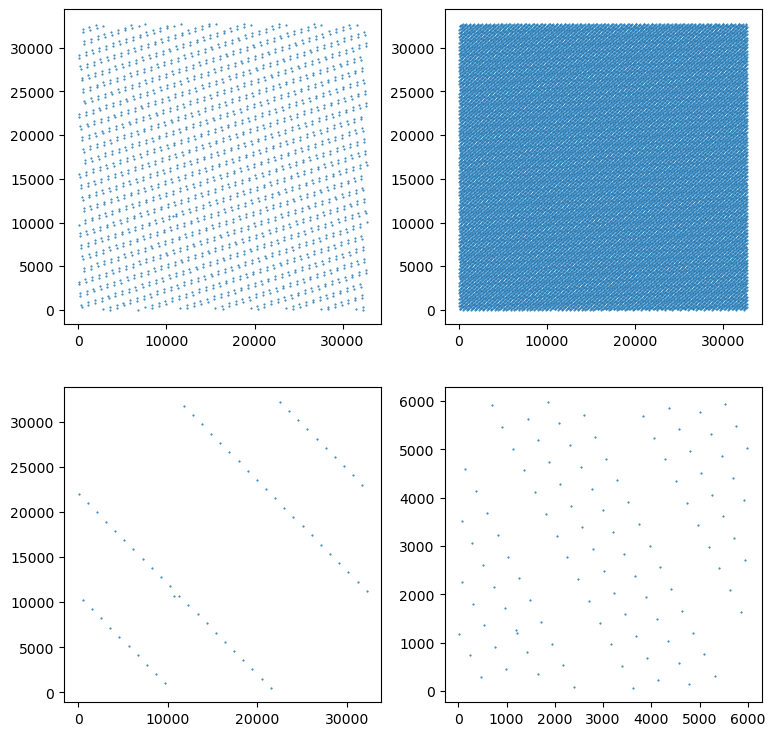

In [7]:
# PLOT CORRELATION

figure(figsize=(9,9))
ax1 = subplot(221)
plot(p1,p1_1,'o', markersize=0.5)
ax2 = subplot(222)
plot(p2,p2_1,'o', markersize=0.5)
ax3 = subplot(223)
plot(p3,p3_1,'o', markersize=0.5)
ax4 = subplot(224)
plot(p4,p4_1,'o', markersize=0.5)

Les valeurs des nombres générés varient de 0 à (environ) 33000. Sans regénérer des nombres, faire le nécessaire pour que ces nombres soient compris entre 0 et 1 (phrase à reformuler). Ensuite, tracer à nouveau les quatres graphiques comme précédemment, avec les nouvelles valeurs.

In [8]:
p1 = array(p1)/max(p1)
p1_1 = array(p1_1)/max(p1_1)
p2 = array(p2)/max(p2)
p2_1 = array(p2_1)/max(p2_1)
p3 = array(p3)/max(p3)
p3_1 = array(p3_1)/max(p3_1)
p4 = array(p4)/max(p4)
p4_1 = array(p4_1)/max(p4_1)

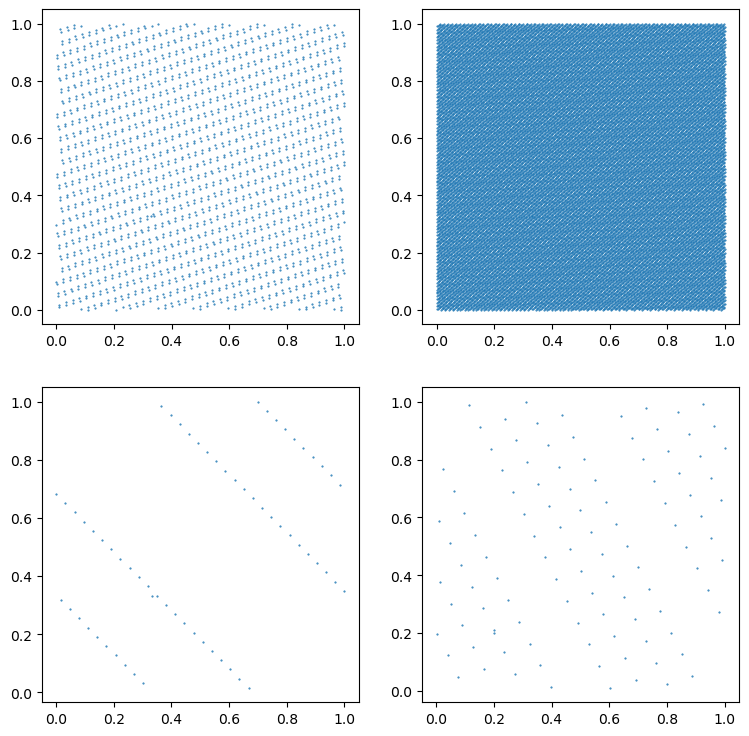

In [9]:
# PLOT UNIFORM CORRELATION

figure(figsize=(9,9))
ax1 = subplot(221)
plot(p1,p1_1,'o', markersize=0.5)
ax2 = subplot(222)
plot(p2,p2_1,'o', markersize=0.5)
ax3 = subplot(223)
plot(p3,p3_1,'o', markersize=0.5)
ax4 = subplot(224)
plot(p4,p4_1,'o', markersize=0.5)

Application chimique: Dissociation d'un acide dont on connait le pKa=4.76. Implementer l'algorithme de Monte Carlo (expliqué avant) pour calculer la fraction de dissociation d'un acide pour des pH de 1 à 8. Utiliser les nombres générés par un des generateurs créés avant (choisir celui avec la plus longue période). Ensuite faire pareil en utilisant cette fois-ci le RNG de python, syntaxe: a=random.random()

Tracer la fraction en fonction du pH dans chaque cas. Ensuite comparer avec les valeurs analytiques (on donne la formule)

In [10]:
# Use the RNG with the longest period in a MC application
# Titration

pH=linspace(1,8,100)
pKa=4.76

sumj=0
j=0
frac=[]
for ph in pH:
    sumj=0
    j=0
    for i in range(1,10000):
        if j==0:
            fij=exp((ph-pKa)*log(10))
            if (fij>(p2[i])):  
                j=1
        else:
            fji=exp(-(ph-pKa)*log(10))
            if(fji>(p2[i])):
                j=0
    
        sumj=sumj+j
    frac.append(sumj/(i))

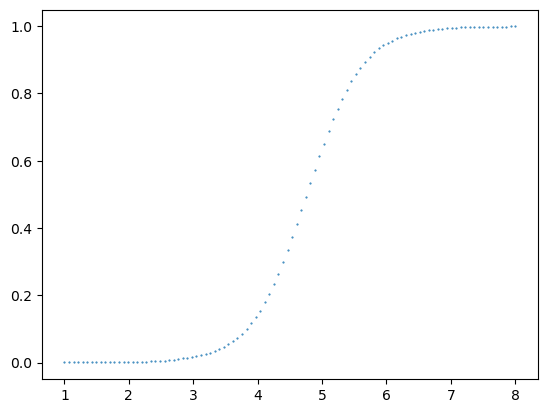

In [11]:
plot(pH,frac,'o',markersize=0.5)

In [12]:
pH=linspace(1,8,100)
pKa=4.76
import random
sumjr=0

fracr=[]
for phr in pH:
    jr=0
    sumjr=0
    for ir in range(1,10000):
        if jr==0:
            fijr=exp((phr-pKa)*log(10))
            a=random.random()
           # print(fijr,a)
            if (fijr>(a)):
                jr=1
        else:
            fijr=exp(-(phr-pKa)*log(10))
            b=random.random()
          #  print(fijr,b)
            if(fijr>(b)):
                jr=0
    
        sumjr=sumjr+jr
    fracr.append(sumjr/(ir))

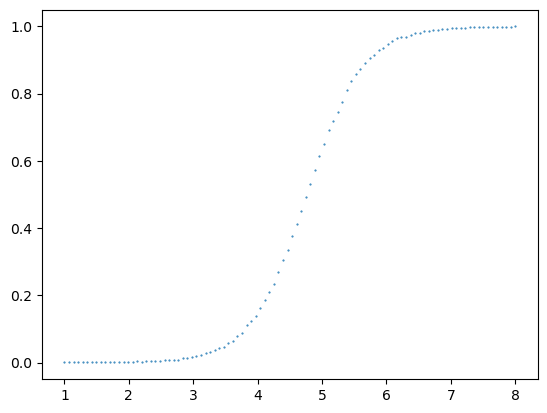

In [13]:
plot(pH,fracr,'o',markersize=0.5)

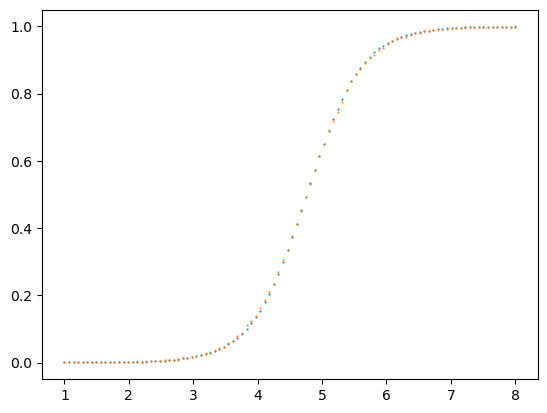

In [14]:
figure()
plot(pH,frac,'o',markersize=0.5)
plot(pH,fracr,'o',markersize=0.5)

In [15]:
#analytical values
def fran(pH,pKa):
    return 1/(1+10**(pKa-pH))
anv=[]
for i in pH:
    anv.append(fran(i,pKa))

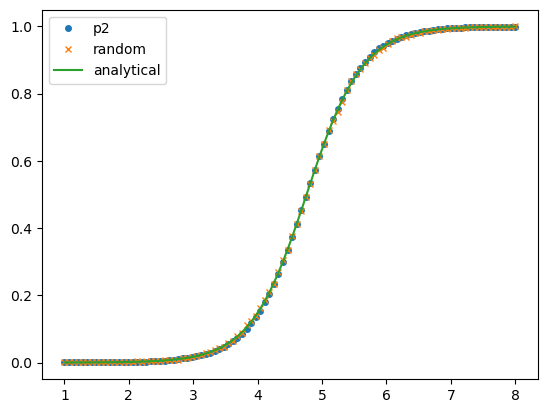

In [16]:
figure()
plot(pH,frac,'o',markersize=4, label="p2")
plot(pH,fracr,'x',markersize=4,label="random")
plot(pH,anv,markersize=0.5,label="analytical")
legend()